# Project - UFO Sightings VS State Population, Education, and Drug Use Metrics
Cody Costa, David Loi, Tue Pham

    this project attempts to illustrate a statistical link between cumulative cases of UFO sightings in the 50 US states with respect to characteristics of the general population inluding:

    1. Average Standardized Intellience Metrics (IQ, SAT, Literacy, etc)
    2. Population size by state (this helps normalize the results on a per person basis)
    3. Average Drug Addiction Rates

## Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

## Load UFO Sighting Data

In [3]:
data = pd.read_csv('ufo-data.csv', sep=',')
data.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation
0,Open,6/10/2024 3:15,La Pine,OR,USA,Orb,Orb shape that flickered or pulsed (visible to...,6/10/2024,NaN,NaN
1,Open,6/9/2024 17:20,New York,NY,USA,Sphere,silver sphere or disc hovering and rotating,6/10/2024,NaN,NaN
2,Open,6/9/2024 3:01,Satellite Beach,FL,USA,Oval,I saw an oblong shaped white object above to m...,6/9/2024,NaN,NaN
3,Open,6/9/2024 1:14,Coopersville,MI,USA,Light,"8-12 white lights in a straight, horizontal li...",6/9/2024,NaN,NaN
4,Open,6/8/2024 22:11,Boone,NC,USA,Cigar,Craft moved rapidly lighting up on and off,6/8/2024,NaN,NaN


In [4]:
data.shape

(2000, 10)

In [5]:
states = data['State']
states

0       OR
1       NY
2       FL
3       MI
4       NC
        ..
1995    OR
1996    OR
1997    OR
1998    OR
1999    OR
Name: State, Length: 2000, dtype: object

In [6]:
state_set = set(states)
len(state_set)

53

#### filter out states without real names
a visual inspection of the data shows some odd state names such as '-' or '0', etc.

In [7]:
f = []
for row in data['State']:
    if len(row) == 2:
        f.append(True)
    else:
        f.append(False)

print(len(set(data[f]['State'])))

data = data[f]

HEIGHT = data.shape[0]
WIDTH  = data.shape[1]

51


#### Distribution of data by US state

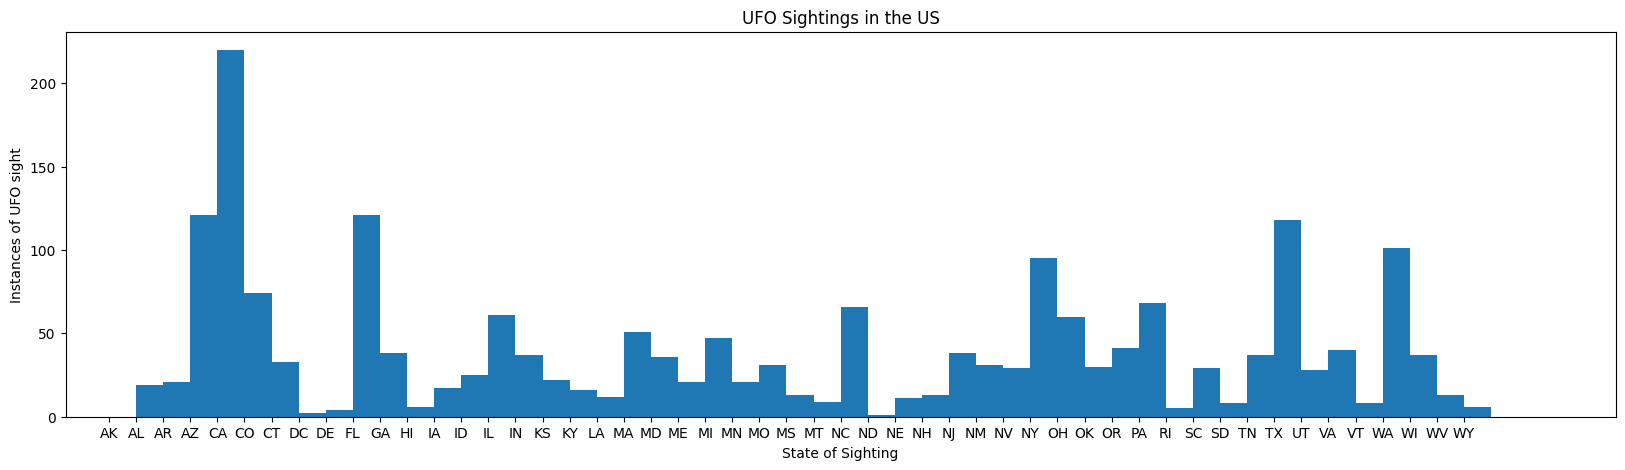

In [8]:
states = data['State']
bins = range(1, len(state_set) + 1)

plt.figure(figsize=[20, 5])
plt.hist(states.sort_values(), bins=bins)
plt.xlabel('State of Sighting')
plt.ylabel('Instances of UFO sight')
plt.title('UFO Sightings in the US')
plt.show()

## Load Population Data

In [9]:
pop = pd.read_csv('populations.csv', sep=',')
pop.head()

# each column is loaded as str type

,Rank,State Abbreviation,State,2024 Population,Growth Rate,2023 Population,2020 Population,Growth Since 2020,% of US,Density
0,1,CA,California,38889770,-0.0019,38965193,39503200,-0.0155,0.1158,250
1,2,TX,Texas,30976754,0.0155,30503301,29234361,0.0596,0.0922,119
2,3,FL,Florida,22975931,0.0162,22610726,21591299,0.0641,0.0684,428
3,4,NY,New York,19469232,-0.0052,19571216,20104710,-0.0316,0.0580,413
4,5,PA,Pennsylvania,12951275,-0.0008,12961683,12995477,-0.0034,0.0386,289


In [10]:
pop.shape

(50, 10)

#### UFO sightings normalized by population of each state

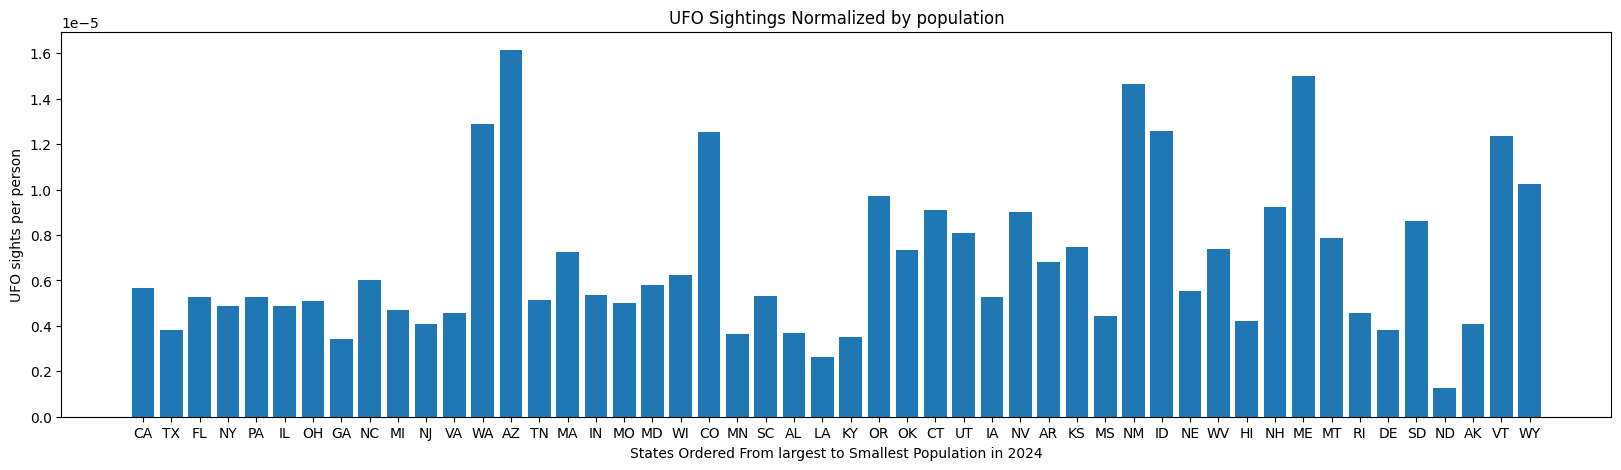

In [11]:
# creating a bar graph here

normalized_ufo_sightings = []

for idx, state in enumerate(pop['State Abbreviation']):
    sights = np.sum(data['State'] == state)
    population = pop['2024 Population'][idx]

    normalized_ufo_sightings.append(sights / population)

# print(normalized_ufo_sightings)

plt.figure(figsize=[20, 5])
plt.bar(pop['State Abbreviation'], normalized_ufo_sightings)
plt.xlabel('States Ordered From largest to Smallest Population in 2024')
plt.ylabel('UFO sights per person')
plt.title('UFO Sightings Normalized by population')
plt.show()

#### Distribution of data over time in the US
Probably will get rid of this, not enough data in the set to compare time of year vs sightings

In [12]:
dates_occurred = data['Occurred']
print(type(dates_occurred[0]))
# filter by month only

months_occurred = []


for date in dates_occurred:
    month = ''
    for k, val in enumerate(date):
        if val == '/':
            break
        month += val
    months_occurred.append(int(month))

<class 'str'>


In [13]:
# bins = range(1, 14)

# plt.figure(figsize=[20, 5])
# plt.hist(months_occurred, bins=bins)
# plt.xlabel('Month')
# plt.ylabel('Instances of UFO sight')
# plt.title('Distribution of months when UFO\'s are spotted')
# plt.xticks(bins)
# plt.show()

## Load IQ Score Data

In [14]:
iq_data = pd.read_csv('iq-scores.csv', sep=',')
iq_data.head()

,Rank,State Abbreviation,State,Average I.Q.,Literacy Rate,Numeracy Rate,Average SAT Score
0,1,MA,Massachusetts,104.3,0.827,0.749,1029
1,2,NH,New Hampshire,104.2,0.885,0.809,1050
2,3,ND,North Dakota,103.8,0.866,0.790,1212
3,4,VT,Vermont,103.8,0.872,0.790,1095
4,5,MN,Minnesota,103.7,0.869,0.796,1225


In [15]:
iq_data.shape

(50, 7)

#### Quick Data of SAT Scores and Avg I.Q.

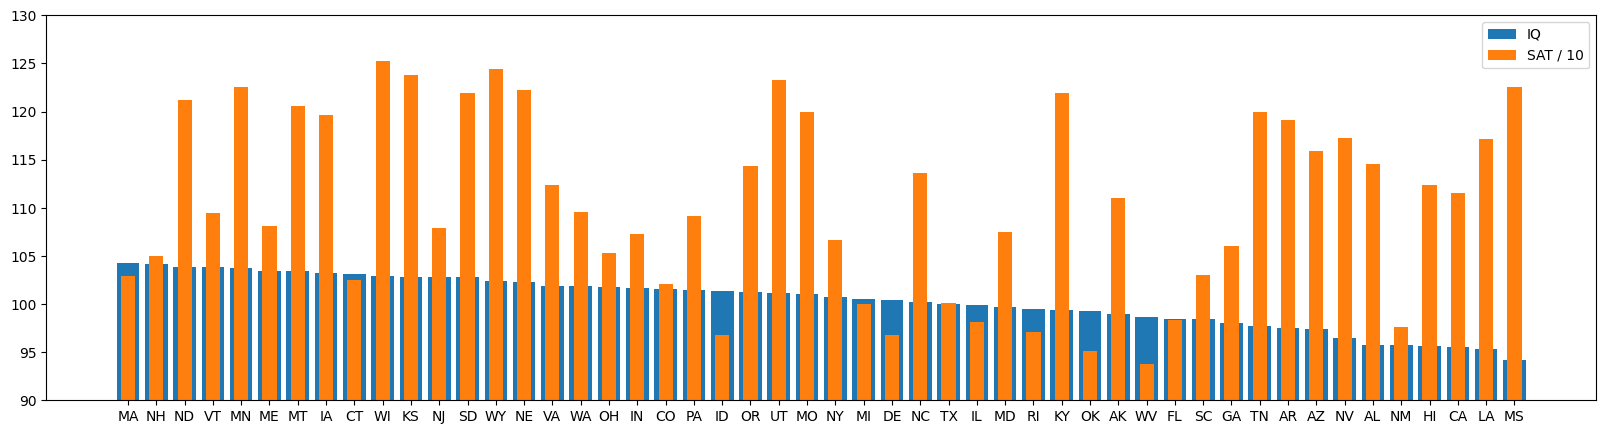

In [16]:
plt.figure(figsize=[20, 5])
plt.bar(iq_data['State Abbreviation'], iq_data['Average I.Q.'])
# plt.hlines(np.mean(iq_data['Average I.Q.']), -1, 50, colors='orange')
plt.bar(iq_data['State Abbreviation'], iq_data['Average SAT Score'] / 10, width=0.5)
plt.legend(['IQ', 'SAT / 10'])
plt.ylim([90, 130])
plt.show()

In [17]:
# plt.figure(figsize=[20, 5])
# plt.bar(iq_data['State Abbreviation'], iq_data['Average SAT Score'])
# plt.show()

#### Normalized UFO sightings vs Average I.Q. / SAT

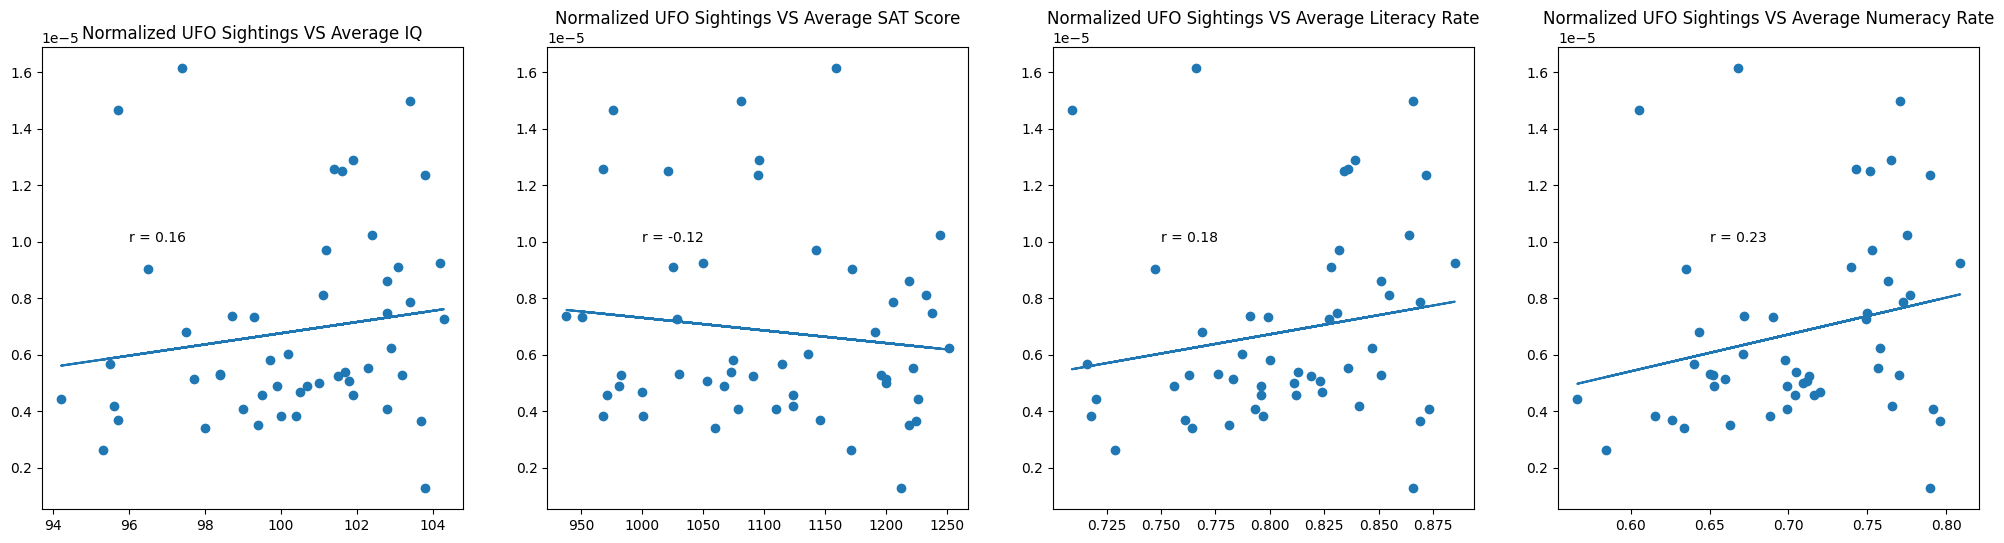

In [65]:
# data for plots

iq_scores   = np.array([])
sat_scores  = np.array([])
literacy    = np.array([])
numeracy    = np.array([])
sights      = np.array(normalized_ufo_sightings)

for idx, state in enumerate(pop['State Abbreviation']):
    row = iq_data['State Abbreviation'] == state
    iq_scores   = np.append(iq_scores, iq_data[row]['Average I.Q.'])
    sat_scores  = np.append(sat_scores, iq_data[row]['Average SAT Score'])
    literacy    = np.append(literacy, iq_data[row]['Literacy Rate'])
    numeracy    = np.append(numeracy, iq_data[row]['Numeracy Rate'])

r1 = stats.pearsonr(iq_scores, sights)[0]
r2 = stats.pearsonr(sat_scores, sights)[0]
r3 = stats.pearsonr(literacy, sights)[0]
r4 = stats.pearsonr(numeracy, sights)[0]

# plots

fit, ax = plt.subplots(1, 4, figsize=[25, 6])

ax[0].scatter(iq_scores, normalized_ufo_sightings)
ax[0].set_title('Normalized UFO Sightings VS Average IQ')
ax[0].text(96, 1.0e-5, f'r = {np.round(r1, 2)}')

ax[1].scatter(sat_scores, normalized_ufo_sightings)
ax[1].set_title('Normalized UFO Sightings VS Average SAT Score')
ax[1].text(1000, 1.0e-5, f'r = {np.round(r2, 2)}')

ax[2].scatter(literacy, normalized_ufo_sightings)
ax[2].set_title('Normalized UFO Sightings VS Average Literacy Rate')
ax[2].text(0.75, 1.0e-5, f'r = {np.round(r3, 2)}')

ax[3].scatter(numeracy, normalized_ufo_sightings)
ax[3].set_title('Normalized UFO Sightings VS Average Numeracy Rate')
ax[3].text(0.65, 1.0e-5, f'r = {np.round(r4, 2)}')


# linear regression

m1, b1 = np.polyfit(iq_scores, sights, 1)
m2, b2 = np.polyfit(sat_scores, sights, 1)
m3, b3 = np.polyfit(literacy, sights, 1)
m4, b4 = np.polyfit(numeracy, sights, 1)

ax[0].plot(iq_scores, m1 * iq_scores + b1)
ax[1].plot(sat_scores, m2 * sat_scores + b2)
ax[2].plot(literacy, m3 * literacy + b3)
ax[3].plot(numeracy, m4 * numeracy + b4)

plt.show()

### Conclusion of Cognitive Relation
    From the visualization of the cognitive ability data, there seems to be a clear positive correlation between the instances of UFO sightings per individual and the strength of the cognitive ability.
    
    The only exception to this outcome is seen among average SAT scores where we observe an inverse relationship, or negative correlation, between the 2 variables.

    It is worth noting as well these are all relatively weak correlations.

## Load Drug Use Data

In [19]:
drug_data = pd.read_csv('drug-use-data.csv', sep=',')
drug_data.head()

,Overall Rank,State Abbreviation,State,Total Score,Drug Use & Addiction Rank,Law Enforcement Rank,Drug Health Issues & Rehab Rank
0,1,NM,New Mexico,69.89,1,13,2
1,2,WV,West Virginia,63.56,5,3,18
2,3,NV,Nevada,56.93,11,29,1
3,4,DC,District of Columbia,56.61,3,31,3
4,5,CO,Colorado,56.46,16,4,17


In [20]:
drug_data.shape

(51, 7)

#### Quick Drugs Use / Health Issues Data

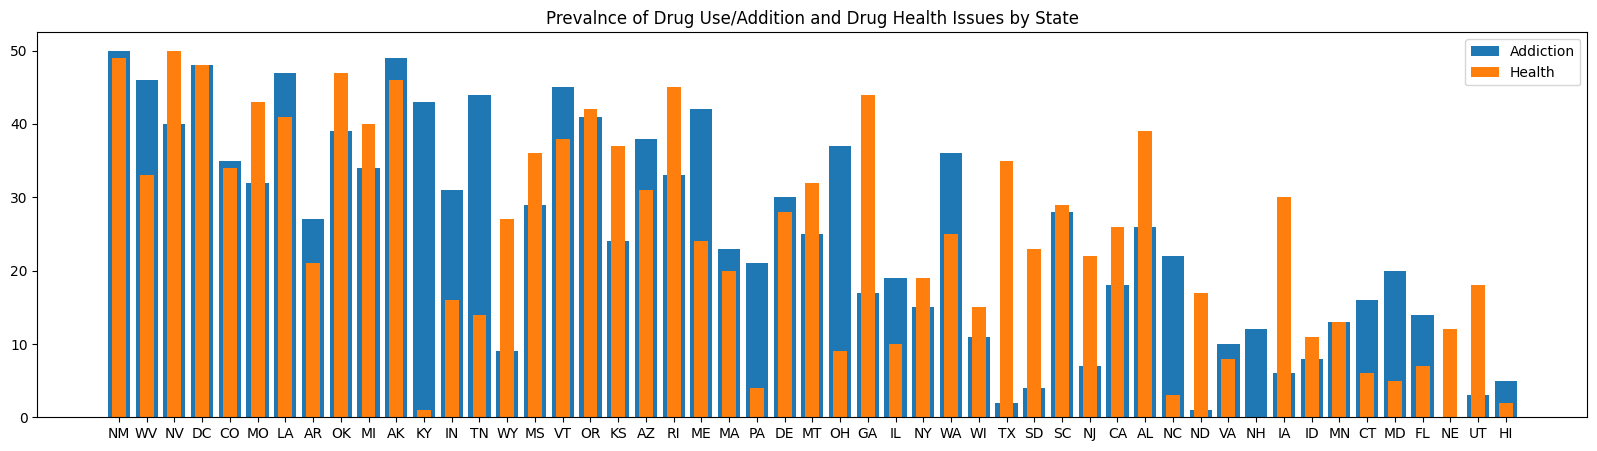

In [29]:
plt.figure(figsize=[20, 5])
plt.bar(drug_data['State Abbreviation'], 51 - drug_data['Drug Use & Addiction Rank'])
plt.bar(drug_data['State Abbreviation'], 51 - drug_data['Drug Health Issues & Rehab Rank'], width=0.5)
plt.title('Prevalnce of Drug Use/Addition and Drug Health Issues by State')
plt.legend(['Addiction', 'Health'])
plt.show()

#### Normalized UFO Sightings VS Average % Population Drug Use

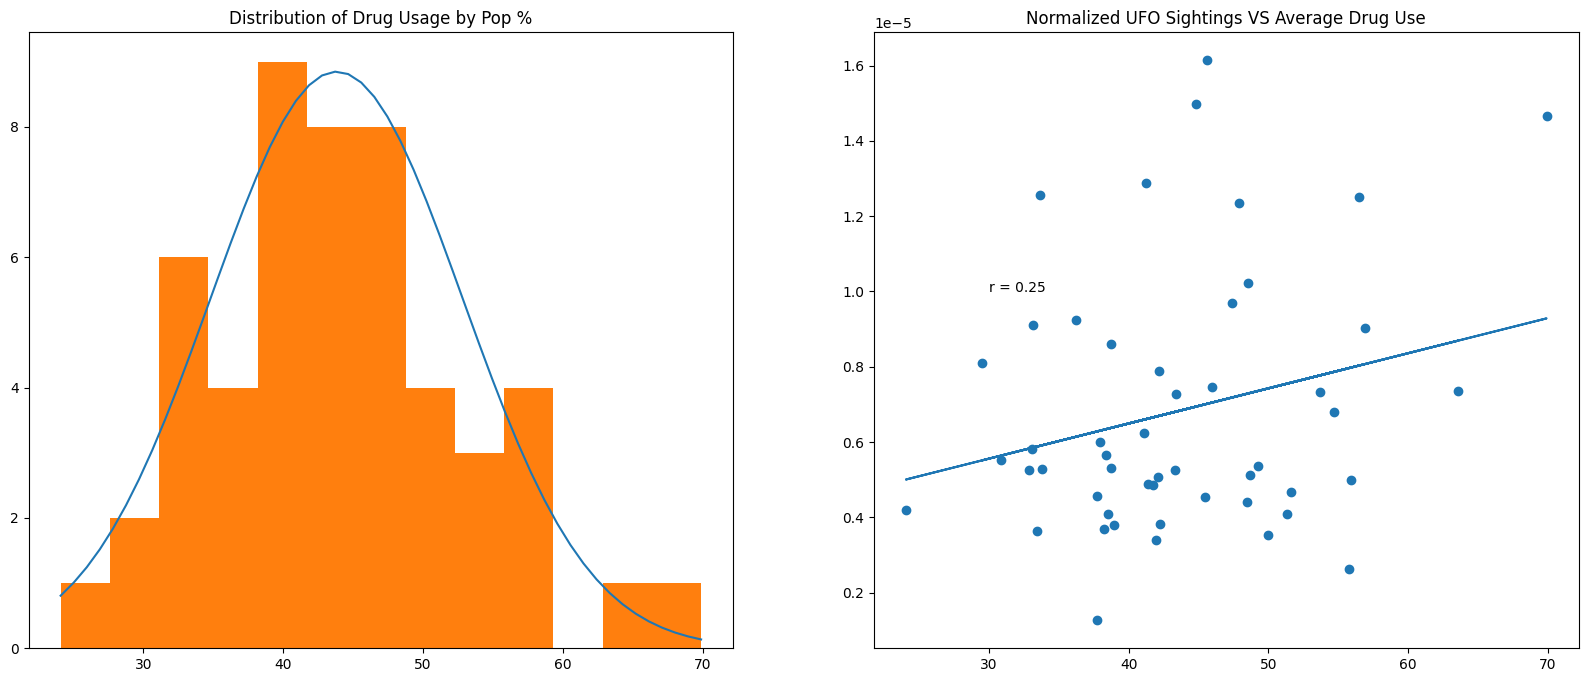

In [71]:
# data for plots

x = np.linspace(np.min(drug_data['Total Score']), np.max(drug_data['Total Score']))
drug_scores = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = drug_data['State Abbreviation'] == state
    drug_scores = np.append(drug_scores, drug_data[row]['Total Score'])

r = stats.pearsonr(drug_scores, sights)[0]

# plots

fit, ax = plt.subplots(1, 2, figsize=[20, 8])
ax[0].plot(x, 200 * stats.norm.pdf(x, np.mean(drug_data['Total Score']), np.std(drug_data['Total Score'])))

ax[0].hist(drug_data['Total Score'], bins=13)
ax[0].set_title('Distribution of Drug Usage by Pop %')

ax[1].scatter(drug_scores, normalized_ufo_sightings)
ax[1].set_title('Normalized UFO Sightings VS Average Drug Use')
ax[1].text(30, 1.0e-5, f'r = {np.round(r, 2)}')


# linear regression

m, b = np.polyfit(drug_scores, sights, 1)
ax[1].plot(drug_scores, m * drug_scores + b)

plt.show()

### Conclusion of Drug Use Relation
    From the visualization of the data, we see the average percentage of a state's population that actively uses drugs is around 40%

    Additionally, we can conclude there is a positive correlation between UFO sightings and the fraction of the population using illicit substances

    Again, the scatter plot provides a relatively weak correlation overall
    

## Combined Influence of Environmental Factors VS Average Normalized UFO Sightings
Now, what if we formulate an equation to give each category some weighted influence on the output readings?